<a href="https://colab.research.google.com/github/claudio1975/Medium-blog/blob/master/Langchain_%26_OpenAI_in_Action/Image_Data_Analysis_with_LangChain_%26_OpenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries and prepare Workspace

datasource: https://www.kaggle.com/datasets/gpiosenka/sports-classification

The picture used is coming from 100 Sports Image Classification dataset.

Images are gathered from internet searches. All images are resized to 224 X 224 X 3 and converted to jpg format. The collection of sports images cover 100 different type of sports.


In [ ]:
# Install the langchain package
!pip install langchain &> /dev/null

In [ ]:
# Install the langchain package with openai
!pip install -U langchain-openai &> /dev/null

In [ ]:
# Import the os package
import os
# Import the openai package
import openai
# Set openai.api_key to the OPENAI_API_KEY environment variable
os.environ["OPENAI_API_KEY"] = ""

In [ ]:
# Import the langchain package as lc
import langchain as lc

# From the langchain.chat_models module, import ChatOpenAI
from langchain_openai import ChatOpenAI

# From the langchain.schema module, import AIMessage, HumanMessage, SystemMessage
from langchain.schema import AIMessage, HumanMessage, SystemMessage

In [ ]:
# Import pandas using the alias pd
import pandas as pd
from skimage import io
from skimage.io import imread

# From the IPython.display package, import display and Markdown
from IPython.display import display, Markdown

In [ ]:
# Create a ChatOpenAI object. Assign to chat.
chat = ChatOpenAI(temperature=0, model_name='gpt-3.5-turbo')

In [ ]:
lc.__version__

In [ ]:
openai.__version__

### Have a look of the data set

Shape of image


(224, 224, 3)

Dimension of image


3

Number of pixels


150528

Basketball


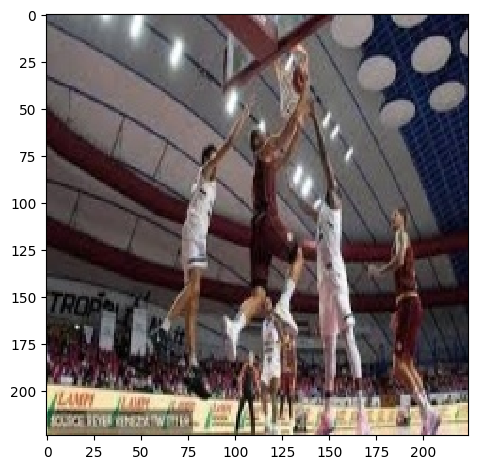

In [ ]:
# Read the data.
image_1 = imread("./088.jpg")

# Display a description of the shape
print("Shape of image")
display(image_1.shape)

# Display the dimension
print("Dimension of image")
display(image_1.ndim)

# Display the number of pixels
print("Number of pixels")
display(image_1.size) # 224 X 224 X 3

print("Basketball")
io.imshow(image_1)

### Prepare the contest for GPT

In [ ]:
# A description of the image
image_description = """
You have a image about sport. It is available as a image named `image_1`.

Image is 224,224,3 jpg format

"""


In [ ]:
# Concatenate the image description and the context.
msgs_context = [
    SystemMessage(content="You are an expert data scientist, and you are involved in a dataset analysis."),
    HumanMessage(content=f"{image_description}")
]

### Use GPT as code assistant to run a data analysis on the image

#### Data Analysis on the colors distribution

In [ ]:
# Ask GPT to provide code for a color analysis
msgs_python_colors = msgs_context+[
    HumanMessage(content=
"Write some Python code to draw a univariate distribution for each color (red, green, blue) from '088.jpg'.\
Organize a chart with 3 columns and one row.\
Use the matplotlib package")]

rsps_python_colors = chat.invoke(msgs_python_colors)

display(Markdown(rsps_python_colors.content))

Sure! Here's an example code that uses the matplotlib package to draw a univariate distribution for each color channel (red, green, blue) from the image '088.jpg':

```python
import matplotlib.pyplot as plt
import cv2

# Load the image
image_path = '088.jpg'
image = cv2.imread(image_path)

# Split the image into color channels
red_channel = image[:,:,0]
green_channel = image[:,:,1]
blue_channel = image[:,:,2]

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the univariate distribution for each color channel
axs[0].hist(red_channel.flatten(), bins=256, color='red', alpha=0.7)
axs[0].set_title('Red Channel')
axs[0].set_xlim([0, 255])

axs[1].hist(green_channel.flatten(), bins=256, color='green', alpha=0.7)
axs[1].set_title('Green Channel')
axs[1].set_xlim([0, 255])

axs[2].hist(blue_channel.flatten(), bins=256, color='blue', alpha=0.7)
axs[2].set_title('Blue Channel')
axs[2].set_xlim([0, 255])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
```

Make sure you have the `matplotlib` and `cv2` packages installed before running this code. The resulting plot will have 3 columns (one for each color channel) and one row, displaying the univariate distribution for each color.

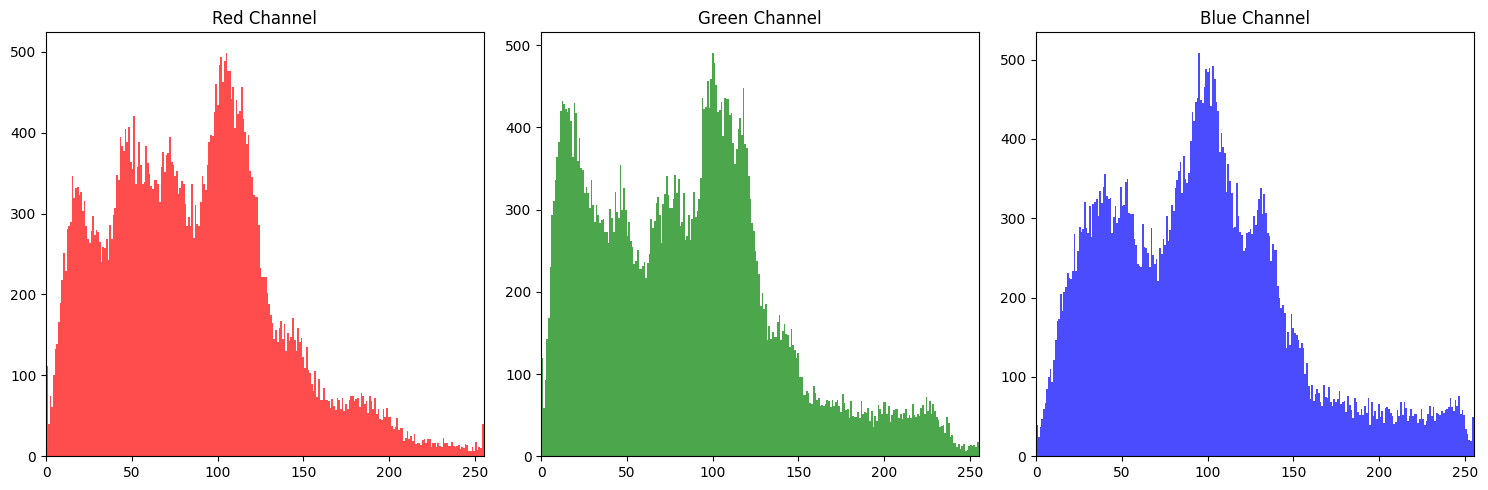

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load the image
image_path = '088.jpg'
image = cv2.imread(image_path)

# Split the image into color channels
red_channel = image[:,:,0]
green_channel = image[:,:,1]
blue_channel = image[:,:,2]

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the univariate distribution for each color channel
axs[0].hist(red_channel.flatten(), bins=256, color='red', alpha=0.7)
axs[0].set_title('Red Channel')
axs[0].set_xlim([0, 255])

axs[1].hist(green_channel.flatten(), bins=256, color='green', alpha=0.7)
axs[1].set_title('Green Channel')
axs[1].set_xlim([0, 255])

axs[2].hist(blue_channel.flatten(), bins=256, color='blue', alpha=0.7)
axs[2].set_title('Blue Channel')
axs[2].set_xlim([0, 255])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Data Analysis on Image Segmentation

In [ ]:
# Ask GPT to provide code for a image segmentation
msgs_python_segmentation = msgs_context+[
    HumanMessage(content=
"Write some Python code to draw a image segmentation from '088.jpg'.\
Use the scikit-image package")]

rsps_python_segmentation = chat.invoke(msgs_python_segmentation)

display(Markdown(rsps_python_segmentation.content))

Sure! Here's an example code to perform image segmentation using the scikit-image package:

```python
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.segmentation import slic

# Load the image
image_path = '088.jpg'
image = imread(image_path)

# Perform image segmentation using SLIC algorithm
segments = slic(image, n_segments=100, compactness=10)

# Display the original image and the segmented image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(segments, cmap='nipy_spectral')
ax[1].set_title('Segmented Image')
ax[1].axis('off')

plt.show()
```

Make sure you have the scikit-image package installed (`pip install scikit-image`) before running this code. The `slic` function is used to perform the image segmentation using the SLIC algorithm. You can adjust the `n_segments` and `compactness` parameters to control the number of segments and the trade-off between color similarity and spatial proximity, respectively.

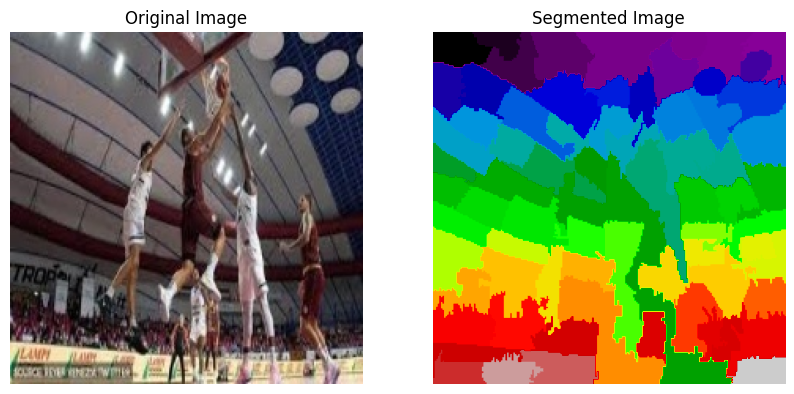

In [ ]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.segmentation import slic

# Load the image
image_path = '088.jpg'
image = imread(image_path)

# Perform image segmentation using SLIC algorithm
segments = slic(image, n_segments=100, compactness=10)

# Display the original image and the segmented image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(segments, cmap='nipy_spectral')
ax[1].set_title('Segmented Image')
ax[1].axis('off')

plt.show()

#### Data Analysis on Binary Image

In [ ]:
# Ask GPT to provide code for a binary image
msgs_python_binary_image = msgs_context+[
    HumanMessage(content=
"Write some Python code to draw a binary image from '088.jpg' using thresholding.\
Use the scikit-image package")]

rsps_python_binary_image = chat.invoke(msgs_python_binary_image)

display(Markdown(rsps_python_binary_image.content))

Sure! Here's an example code that uses the scikit-image package to draw a binary image from the given image using thresholding:

```python
import matplotlib.pyplot as plt
from skimage import io, filters

# Load the image
image_path = '088.jpg'
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = image.mean(axis=2)

# Apply thresholding to create a binary image
threshold = filters.threshold_otsu(gray_image)
binary_image = gray_image > threshold

# Display the original and binary images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Binary Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()
```

Make sure you have the scikit-image package installed (`pip install scikit-image`) before running this code.

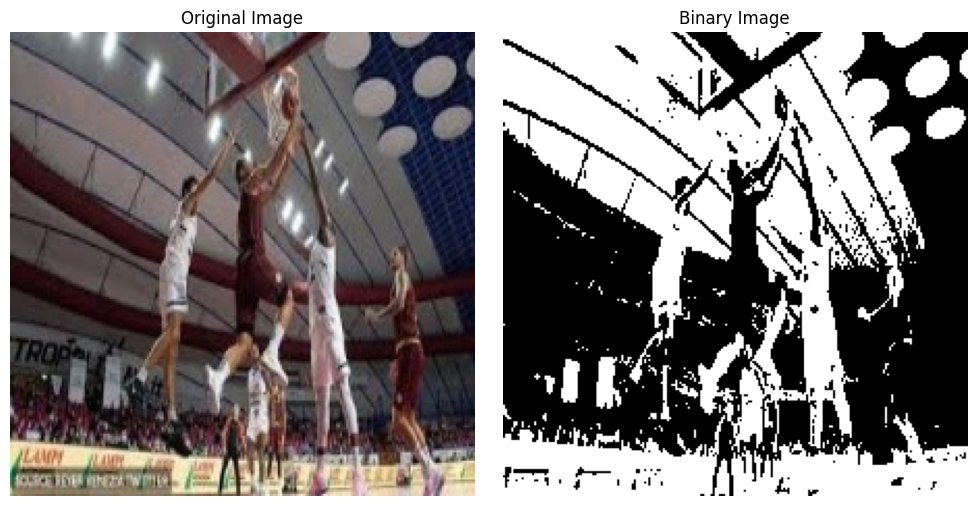

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, filters

# Load the image
image_path = '088.jpg'
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = image.mean(axis=2)

# Apply thresholding to create a binary image
threshold = filters.threshold_otsu(gray_image)
binary_image = gray_image > threshold

# Display the original and binary images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Binary Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()
